In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
# for simple linear regression and multi linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [116]:
df = sns.load_dataset('titanic')

In [117]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


*Cleaning data*

In [118]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [119]:
df['age'].fillna(df['age'].median(), inplace=True)

C:\Users\E-TIME\AppData\Local\Temp\ipykernel_27600\1654433547.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


In [120]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [121]:
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

C:\Users\E-TIME\AppData\Local\Temp\ipykernel_27600\1964997694.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)


In [122]:
df['deck'].fillna(df['deck'].mode()[0], inplace=True)

C:\Users\E-TIME\AppData\Local\Temp\ipykernel_27600\3694098892.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['deck'].fillna(df['deck'].mode()[0], inplace=True)


In [123]:
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

C:\Users\E-TIME\AppData\Local\Temp\ipykernel_27600\395761809.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)


In [124]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [125]:
#split data
X = df[['age']]
Y = df['fare']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

In [126]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [127]:
print(f"Intercept (b0): {model.intercept_}")
print(f"Coefficient (b1): {model.coef_[0]}")

Intercept (b0): 22.01285000657193
Coefficient (b1): 0.36205243579534524


In [128]:
y_pred = model.predict(X_test)

In [129]:
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 1524.6365182168759
R² Score: 0.014729652921299241


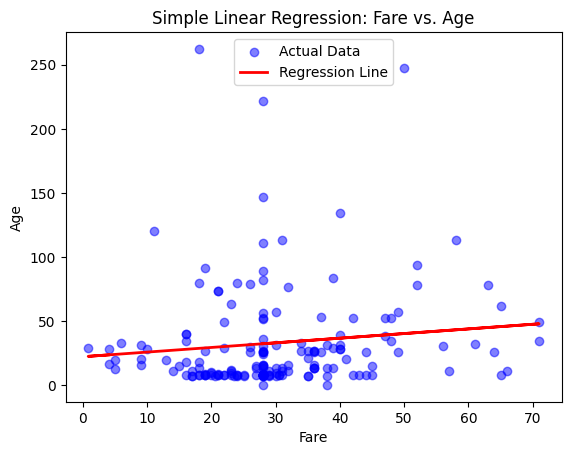

In [130]:
plt.scatter(X_test, Y_test, color='blue', alpha=0.5, label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Fare")
plt.ylabel("Age")
plt.title("Simple Linear Regression: Fare vs. Age")
plt.legend()
plt.show()

*Multi Linear Regression*

In [131]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True


In [132]:
X = df[['fare', 'sibsp','parch', 'pclass']]
Y = df['age']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [133]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [134]:
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercept: 43.77538724276586
Coefficients: [-0.01230484 -1.69748041 -1.75079115 -5.39344481]


In [135]:
y_pred = model.predict(X_test)

In [136]:
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 140.6724
R² Score: 0.1737


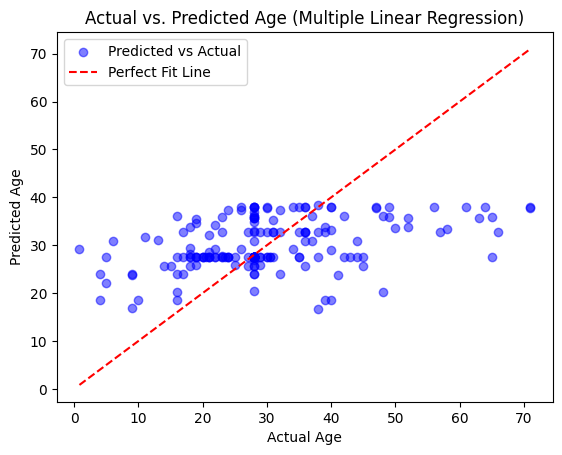

In [137]:
plt.scatter(Y_test, y_pred, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--', label='Perfect Fit Line')
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("Actual vs. Predicted Age (Multiple Linear Regression)")
plt.legend()
plt.show()


**Logistic Regression**

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [139]:
X = df[['age', 'fare', 'pclass', 'sibsp', 'parch']]
Y = df['survived']

X_test, X_train, Y_test, Y_train = train_test_split(X,Y, test_size=0.2, random_state=42)

In [140]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [141]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [142]:
y_pred = model.predict(X_test)

Accuracy: 0.6868

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.80      0.76       444
           1       0.60      0.49      0.54       268

    accuracy                           0.69       712
   macro avg       0.66      0.65      0.65       712
weighted avg       0.68      0.69      0.68       712


Confusion Matrix:


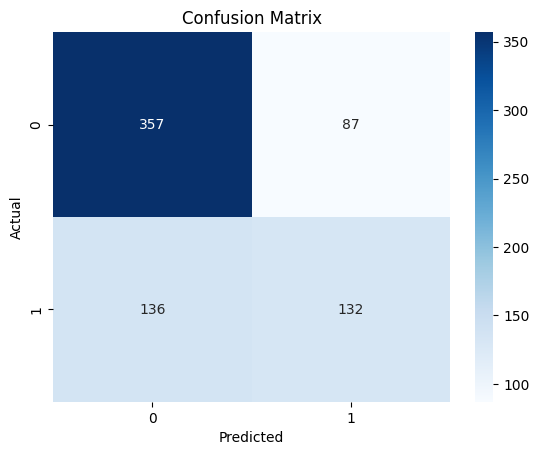

In [143]:
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(Y_test, y_pred))

print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()